# **PROJECT:** playstore_app_analysis

**Project Type** - EDA (Exploratory Data Analysis)

**Contribution** - Individual

## **PROJECT SUMMARY:**

This project aims to explore Google Play Store data to uncover actionable insights for app developers, focusing on user engagement, satisfaction, and app success. By leveraging Exploratory Data Analysis (EDA), the study examines attributes like app category, ratings, and user reviews to identify patterns and trends. The goal is to help developers optimize their apps, improve user experiences, and make data-driven decisions. Key challenges include handling missing data and outliers, with visualizations playing a critical role in presenting findings. Ultimately, this analysis will provide valuable insights to guide developers in a highly competitive marketplace.

## **GITHUB LINK:**

Link: https://github.com/kush-agra-soni/play_store_eda.git

## **PROBLEM STATEMENT**


The Playstore App Review Analysis project aims to uncover key factors that drive app success on the Google Play Store by conducting an in-depth Exploratory Data Analysis (EDA). The project will analyze various attributes such as app ratings, categories, user reviews, and pricing models to identify patterns, correlations, and trends. The goal is to derive actionable insights that can help developers optimize their apps, improve user satisfaction, and make informed decisions to enhance app performance in a competitive marketplace.

#### **Define Your Business Objective?**

*Optimizing App Success Rate*

## **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# **BEGINING:**

## ***1. KNOW YOUR DATA***

### Import Libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import missingno as msno
from sklearn.preprocessing import StandardScaler
from scipy import stats

### Dataset Loading

In [96]:
# Load the play_store_data.csv file
play_data = pd.read_csv('play_store_data.csv')
user_data = pd.read_csv('user_reviews.csv')

### Dataset First View

In [97]:
play_data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [98]:
user_data.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [99]:
print('PlayStore =' , play_data.shape)
print('User Reviews =', user_data.shape)

PlayStore = (10841, 13)
User Reviews = (64295, 5)


### Dataset Information

In [100]:
print(play_data.info())
print()
print(user_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtyp

#### Duplicate Values

In [101]:
# Dataset Duplicate Value Count
print('PlayStore Duplicates =', len(play_data[play_data.duplicated()]))
print('User Reviews Duplicates =', len(user_data[user_data.duplicated()]))

PlayStore Duplicates = 483
User Reviews Duplicates = 33616


#### Missing Values/Null Values

In [102]:
# Missing Values/Null Values Count
print('PlayStore Missing Values =\n',play_data.isnull().sum())
print()
print('User Reviews Missing Values =\n',user_data.isnull().sum())

PlayStore Missing Values =
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

User Reviews Missing Values =
 App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


### What did you know about your dataset?

**<u>PLAYSTORE :</u>**
  The dataset, comprising **10,841** entries across **13** columns, is central to our project focused on analyzing app details from the Google Play Store. ```Key columns include App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver and Android Ver.``` This data offers insights into various aspects of apps, such as their names, categories, user ratings, review counts, sizes, and install figures. The Rating column has significant missing values **(1,474)**, while Type, Content Rating, Current Ver, and Android Ver also have a few missing values.

---

 **<u>USER REVIEWS :</u>**
 The dataset contains **64,295** entries across **5** columns, focusing on user reviews for various apps available on the Google Play Store.``` The key columns include App, Translated_Review, Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity.``` This dataset is crucial for understanding user feedback, sentiment, and overall user satisfaction with different apps. However, it has significant missing values: Translated_Review (26,868), and Sentiment, Sentiment_Polarity, Sentiment_Subjectivity.

## ***2. UNDERSTANDING YOUR VARIABLES***

PLAYSTORE VARIABLES:

In [103]:
# Dataset Columns
play_data.columns
# Dataset Describe
play_data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


USER DATA VARIABLES:

In [104]:
# Dataset Columns
user_data.columns
# Dataset Describe
user_data.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


### Variables Description

PlayStore variables description:

* App: App name.
* Category: App category.
* Rating: Average user rating.
* Reviews: Number of user reviews.
* Size: App size.
* Installs: Number of installations.
* Type: Free or Paid.
* Price: App price.
* Content Rating: Suitable age group.
* Genres: App genres.
* Last Updated: Date of last update.
* Current Ver: Current app version.
* Android Ver: Required Android version.

---

User Reviews variables description:

* App: App name.
* Translated_Review: Translated review content.
* Sentiment: Review sentiment.
* Sentiment_Polarity: Polarity score.
* Sentiment_Subjectivity: Subjectivity score.

### Check Unique Values for each variable.

In [105]:
# Check Unique Values for each variable.
for i in play_data.columns.tolist():
  print("No. of unique values in PlayStore data for ",i,"is",play_data[i].nunique(),".")

print()

for i in user_data.columns.tolist():
  print("No. of unique values in User reviews data for ",i,"is",user_data[i].nunique(),".")

No. of unique values in PlayStore data for  App is 9660 .
No. of unique values in PlayStore data for  Category is 34 .
No. of unique values in PlayStore data for  Rating is 40 .
No. of unique values in PlayStore data for  Reviews is 6002 .
No. of unique values in PlayStore data for  Size is 462 .
No. of unique values in PlayStore data for  Installs is 22 .
No. of unique values in PlayStore data for  Type is 3 .
No. of unique values in PlayStore data for  Price is 93 .
No. of unique values in PlayStore data for  Content Rating is 6 .
No. of unique values in PlayStore data for  Genres is 120 .
No. of unique values in PlayStore data for  Last Updated is 1378 .
No. of unique values in PlayStore data for  Current Ver is 2832 .
No. of unique values in PlayStore data for  Android Ver is 33 .

No. of unique values in User reviews data for  App is 1074 .
No. of unique values in User reviews data for  Translated_Review is 27994 .
No. of unique values in User reviews data for  Sentiment is 3 .
No

##***3. DATA WRANGLING***

**<u> DATA WRANGLING (USER REVIEWS DATA SETS) </u>**

### Data Wrangling Code

In [106]:
# Load the dataset
df = pd.read_csv('user_reviews.csv')

# Display the initial shape of the dataset
print(f"Initial shape: {df.shape}")

Initial shape: (64295, 5)


In [107]:
# Handle missing values:
# 1. Remove rows where Translated_Review, Sentiment, Sentiment_Polarity, or Sentiment_Subjectivity are NaN
df.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], inplace=True)

# 2. Replace remaining NaN values in numerical columns (Sentiment_Polarity, Sentiment_Subjectivity) with the mean values
df = df.assign(
    Sentiment_Polarity=df['Sentiment_Polarity'].fillna(df['Sentiment_Polarity'].mean()),
    Sentiment_Subjectivity=df['Sentiment_Subjectivity'].fillna(df['Sentiment_Subjectivity'].mean())
)

# Display the shape of the dataset after processing
print(f"Shape after processing: {df.shape}")

Shape after processing: (37427, 5)


In [108]:
# Define function to classify sentiment based on mean Sentiment_Polarity
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [109]:
# Group by 'App' and calculate mean for 'Sentiment_Polarity' and 'Sentiment_Subjectivity'
aggregated_df = df.groupby('App').agg({
    'Sentiment_Polarity': 'mean',
    'Sentiment_Subjectivity': 'mean'
}).reset_index()

# Round values to 2 decimal places
aggregated_df['Sentiment_Polarity'] = aggregated_df['Sentiment_Polarity'].round(2)
aggregated_df['Sentiment_Subjectivity'] = aggregated_df['Sentiment_Subjectivity'].round(2)

In [110]:
# Classify sentiment based on mean Sentiment_Polarity
aggregated_df['Sentiment'] = aggregated_df['Sentiment_Polarity'].apply(classify_sentiment)

# Rename the columns for clarity
aggregated_df.columns = ['App', 'Polarity', 'Subjectivity', 'Sentiment']

In [111]:
# Save the aggregated results to a new CSV file
aggregated_df.to_csv('final_review_data.csv', index=False)

print("Aggregated data saved to 'final_review_data.csv'.")

Aggregated data saved to 'final_review_data.csv'.


In [112]:
df = pd.read_csv('final_review_data.csv')
df.head()

,App,Polarity,Subjectivity,Sentiment
0,10 Best Foods for You,0.47,0.50,Positive
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.39,0.55,Positive
2,11st,0.19,0.46,Positive
3,1800 Contacts - Lens Store,0.32,0.59,Positive
4,1LINE – One Line with One Touch,0.20,0.56,Positive


**<u>SOME INSIGHTS FROM USER REVIEWS DATA SET</u>**

In [113]:
# Load the dataset
df = pd.read_csv('final_review_data.csv')

# Summary Statistics
summary_stats = df[['Polarity', 'Subjectivity']].describe()
print("Summary Statistics for Polarity and Subjectivity:")
print(summary_stats)

Summary Statistics for Polarity and Subjectivity:
         Polarity  Subjectivity
count  865.000000    865.000000
mean     0.200208      0.489954
std      0.163867      0.086018
min     -0.670000      0.000000
25%      0.080000      0.450000
50%      0.200000      0.500000
75%      0.300000      0.540000
max      1.000000      0.920000


In [114]:
# Sentiment Distribution
sentiment_distribution = df['Sentiment'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_distribution)


Sentiment Distribution:
Sentiment
Positive    778
Negative     76
Neutral      11
Name: count, dtype: int64


In [115]:
# Load the dataset
df = pd.read_csv('final_review_data.csv')

# Calculate the correlation matrix
correlation_matrix = df[['Polarity', 'Subjectivity']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              Polarity  Subjectivity
Polarity      1.000000      0.307083
Subjectivity  0.307083      1.000000


---

**<u> DATA WRANGLING (PLAY STORE DATA SETS) </u>**

In [116]:
# Load the dataset
df = pd.read_csv('play_store_data.csv')

In [117]:
# Identify numerical and categorical columns
numerical_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
categorical_cols = ['Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

In [118]:
# Handle Size column separately
def convert_size(size_str):
    if size_str == 'Varies with device':
        return np.nan
    size_str = size_str.upper()
    if 'M' in size_str:
        return float(size_str.replace('M', '').strip())  # Convert to float
    elif 'K' in size_str:
        return float(size_str.replace('K', '').strip()) / 1000  # Convert K to M
    else:
        return np.nan  # If not M or K, return NaN

df['Size'] = df['Size'].apply(convert_size)

# Format 'Size' column to append "M" to the values
def format_size(value):
    return f"{value:.1f}M" if pd.notna(value) else "Varies with device"

df['Size'] = df['Size'].apply(format_size)

In [119]:
# Handle Installs column
def convert_installs(install_str):
    # Check if the install_str is numeric or not
    if install_str.replace(',', '').replace('+', '').isnumeric():
        return float(install_str.replace(',', '').replace('+', ''))  # Remove commas and '+' and convert to float
    else:
        return np.nan  # Return NaN for non-numeric values

df['Installs'] = df['Installs'].apply(convert_installs)

# Format 'Installs' column with commas and '+' sign
def format_installs(value):
    return f"{int(value):,}+" if pd.notna(value) else np.nan

df['Installs'] = df['Installs'].apply(format_installs)

In [120]:
# Handle Price column
def convert_price(price_str, type_str):
    if type_str == 'Free':
        return 0.0
    elif type_str == 'Paid':
        price_str = price_str.replace('$', '')  # Remove dollar sign
        return float(price_str)  # Convert to float
    else:
        return np.nan

df['Price'] = df.apply(lambda row: convert_price(row['Price'], row['Type']), axis=1)

# Format 'Price' column with dollar sign
df['Price'] = df['Price'].apply(lambda x: f"${x:.2f}" if pd.notna(x) else np.nan)

# Replace NaN values in 'Price' column based on 'Type'
paid_mean = df.loc[df['Type'] == 'Paid', 'Price'].str.replace(r'\$', '', regex=True).astype(float).mean()  # Mean of 'Paid' prices
df['Price'] = df['Price'].fillna(f"${paid_mean:.2f}")

In [121]:
# Handle the 'Rating' column: replace NaN with the mean of 'Rating' and round to 1 decimal place
df['Rating'] = df['Rating'].fillna(df['Rating'].mean()).round(1)

In [122]:
# Replace NaN values in categorical columns with the mode (most frequent value)
df = df.apply(lambda col: col.fillna(col.mode()[0]) if col.name in categorical_cols else col)

In [123]:
# Save the cleaned dataset
df.to_csv('final_playstore_data.csv', index=False)
print("Cleaned dataset saved to 'final_playstore_data.csv'.")

Cleaned dataset saved to 'final_playstore_data.csv'.


In [124]:
# Convert all columns to string
df = df.astype(str)

# Verify the data types
print(df.dtypes)

App               object
Category          object
Rating            object
Reviews           object
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object


In [125]:
df = pd.read_csv('final_playstore_data.csv')
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0M,"10,000+",Free,$0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0M,"500,000+",Free,$0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,$0.00,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


**<u>SOME INSIGHTS FROM PLAY STORE DATA SET</u>**

In [126]:
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

In [127]:
# Data Preprocessing - Clean 'Size' column
def convert_size(size):
    if isinstance(size, str):  # Check if size is a string
        if 'M' in size:
            return float(size.replace('M', '')) * 1024  # Convert MB to KB
        elif 'k' in size:
            return float(size.replace('k', ''))  # Keep kB as is
    return np.nan  # For 'Varies with device' or other non-numeric values

df['Size'] = df['Size'].astype(str).apply(convert_size)

In [128]:
# Data Preprocessing - Clean 'Installs' column
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)

In [129]:
# Data Preprocessing - Clean 'Price' column (removing $ sign)
df['Price'] = df['Price'].str.replace(r'\$', '', regex=True).astype(float)

In [130]:
# Data Preprocessing - Handle 'Android Ver' column
def extract_android_ver(ver):
    try:
        version = ver.split()[0]  # Extract the first part before 'and up'
        version_parts = version.split('.')  # Split by '.'
        major_minor_version = '.'.join(version_parts[:2])  # Take only the first two parts
        return float(major_minor_version)
    except:
        return np.nan

df['Android Ver'] = df['Android Ver'].apply(extract_android_ver)

In [131]:
# Filter out rows where 'Last Updated' does not contain a valid date
df = df[df['Last Updated'].str.contains(r'\d{4}', regex=True)]

In [132]:
# Convert 'Last Updated' to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Drop rows where 'Last Updated' couldn't be converted (if any)
df = df.dropna(subset=['Last Updated'])

In [133]:
# Question 1: Which Genres have the highest average rating?
best_genres = df.groupby('Genres')['Rating'].mean().idxmax()
print("Genres with the highest average rating:", best_genres)

Genres with the highest average rating: Board;Pretend Play


In [134]:
# Question 2: Is there a correlation between the number of Reviews and the Rating of an app?
reviews_rating_correlation = df['Reviews'].astype(float).corr(df['Rating'])
print("Correlation between Reviews and Rating:", reviews_rating_correlation)

Correlation between Reviews and Rating: 0.0676617168964989


In [135]:
# Question 3: What is the average app size for each Category, and how does it relate to the number of Installs?
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Data Preprocessing

# Clean 'Size' column
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', '')) * 1024  # Convert MB to KB
        elif 'k' in size:
            return float(size.replace('k', ''))  # Keep kB as is
    return np.nan  # For non-numeric values

df['Size'] = df['Size'].apply(convert_size)

# Convert 'Installs' to float and format for readability
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)

# Calculate average size and installs per Category
average_size_installs = df.groupby('Category')[['Size', 'Installs']].mean()

# Convert the average size to MB and add 'M' suffix
average_size_installs['Size'] = average_size_installs['Size'] / 1024  # Convert KB to MB
average_size_installs['Size'] = average_size_installs['Size'].apply(lambda x: f"{x:.2f}M")

# Convert the installs to readable format
def format_installs(value):
    if value >= 1e6:
        return f"{value / 1e6:.2f}M"
    elif value >= 1e3:
        return f"{value / 1e3:.2f}K"
    else:
        return str(value)

average_size_installs['Installs'] = average_size_installs['Installs'].apply(format_installs)

# Remove the first row from average_size_installs
average_size_installs = average_size_installs.iloc[1:]

# Display results
print("Average app size and installs per Category:\n", average_size_installs)


Average app size and installs per Category:
                        Size Installs
Category                            
ART_AND_DESIGN       12.37M    1.91M
AUTO_AND_VEHICLES    20.04M  625.06K
BEAUTY               13.80M  513.15K
BOOKS_AND_REFERENCE  13.31M    8.32M
BUSINESS             14.47M    2.18M
COMICS               13.48M  934.77K
COMMUNICATION        11.77M   84.36M
DATING               16.63M    1.13M
EDUCATION            20.79M    5.59M
ENTERTAINMENT        21.85M   19.26M
EVENTS               13.96M  249.58K
FAMILY               28.32M    5.20M
FINANCE              17.93M    2.40M
FOOD_AND_DRINK       22.18M    2.16M
GAME                 44.37M   30.67M
HEALTH_AND_FITNESS   22.77M    4.64M
HOUSE_AND_HOME       15.98M    1.92M
LIBRARIES_AND_DEMO   11.08M  741.13K
LIFESTYLE            14.75M    1.41M
MAPS_AND_NAVIGATION  16.61M    5.29M
MEDICAL              19.63M  115.03K
NEWS_AND_MAGAZINES   13.02M   26.49M
PARENTING            22.51M  525.35K
PERSONALIZATION      11.30M   

In [136]:
# Question 4: Does the Type (Free or Paid) influence the average Rating of an app?
type_rating = df.groupby('Type')['Rating'].mean()
print("Average Rating per Type:\n", type_rating)

Average Rating per Type:
 Type
0       19.000000
Free     4.188018
Paid     4.253875
Name: Rating, dtype: float64


In [137]:
# Question 5: Which Category has the highest number of Installs?
most_installed_category = df.groupby('Category')['Installs'].sum().idxmax()
print("Category with the highest number of Installs:", most_installed_category)

Category with the highest number of Installs: GAME


In [138]:
# Question 6: How does the Content Rating affect the number of Installs?
content_rating_installs = df.groupby('Content Rating')['Installs'].mean()

# Convert the installs to readable format (in millions)
content_rating_installs = content_rating_installs.apply(lambda x: f"{x / 1e6:.2f}M")

print("Average number of Installs per Content Rating:\n", content_rating_installs)

Average number of Installs per Content Rating:
 Content Rating
Adults only 18+     0.67M
Everyone           13.10M
Everyone 10+       31.97M
Mature 17+         11.07M
Teen               28.74M
Unrated             0.03M
Name: Installs, dtype: object


In [139]:
# Question 7: Is there a relationship between the Android Version requirement and the number of Installs?
android_version_installs = df.groupby('Android Ver')['Installs'].mean()

# Convert the installs to readable format (in millions)
android_version_installs = android_version_installs.apply(lambda x: f"{x / 1e6:.2f}M")

print("Average number of Installs per Android Version:\n", android_version_installs)

Average number of Installs per Android Version:
 Android Ver
1.0 and up              0.03M
1.5 and up              1.19M
1.6 and up              0.40M
2.0 and up              1.11M
2.0.1 and up           14.44M
2.1 and up              2.35M
2.2 - 7.1.1             0.00M
2.2 and up              0.40M
2.3 and up              4.22M
2.3.3 and up            3.15M
3.0 and up              2.37M
3.1 and up              5.10M
3.2 and up              0.23M
4.0 and up              9.84M
4.0.3 - 7.1.1           7.50M
4.0.3 and up            5.01M
4.1 - 7.1.1           100.00M
4.1 and up             12.52M
4.2 and up              5.07M
4.3 and up              4.19M
4.4 and up             12.16M
4.4W and up             0.00M
5.0 - 6.0               0.01M
5.0 - 7.1.1             0.00M
5.0 - 8.0              10.00M
5.0 and up              3.75M
5.1 and up              0.35M
6.0 and up              1.21M
7.0 - 7.1.1             1.00M
7.0 and up              5.32M
7.1 and up             33.68M
8.0 and u

In [140]:
# Question 8: How does the Last Updated date affect the Rating and number of Installs?
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Data Preprocessing

# Convert 'Last Updated' to datetime, invalid parsing will be set as NaT
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Drop rows where 'Last Updated' is NaT
df = df.dropna(subset=['Last Updated'])

# Clean 'Size' column
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', '')) * 1024  # Convert MB to KB
        elif 'k' in size:
            return float(size.replace('k', ''))  # Keep kB as is
    return np.nan  # For non-numeric values

df['Size'] = df['Size'].apply(convert_size)

# Convert 'Installs' to float and format for readability
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)

# Calculate the effect of Last Updated date on Rating and Installs
last_updated_effect = df.groupby(pd.Grouper(key='Last Updated', freq='YE'))[['Rating', 'Installs']].mean()

# Round the Rating to 1 decimal place
last_updated_effect['Rating'] = last_updated_effect['Rating'].round(1)

# Convert Installs to a readable format with a suffix
last_updated_effect['Installs'] = (last_updated_effect['Installs'] / 1e5).apply(lambda x: f"{x:.1f}k")

# Display results
print("Effect of Last Updated date on Rating and Installs:\n", last_updated_effect)


Effect of Last Updated date on Rating and Installs:
               Rating Installs
Last Updated                 
2010-12-31       4.2     1.0k
2011-12-31       4.0    11.6k
2012-12-31       3.9     5.4k
2013-12-31       4.1     9.4k
2014-12-31       4.1    12.9k
2015-12-31       4.1     9.2k
2016-12-31       4.1    17.4k
2017-12-31       4.1    21.8k
2018-12-31       4.2   219.5k


In [141]:
# Question 9: Does the Price of Paid apps correlate with their Rating and number of Installs?
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Data Preprocessing

# Convert 'Price' to numeric by removing the '$' sign and converting to float
df['Price'] = df['Price'].replace({r'\$': '', ',': ''}, regex=True).astype(float)

# Clean 'Installs' by removing ',' and '+', then convert to float
df['Installs'] = df['Installs'].replace({r'[,+]': ''}, regex=True).astype(float)

# Ensure 'Rating' is in numeric format
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop rows with NaN values in 'Price', 'Rating', or 'Installs'
df = df.dropna(subset=['Price', 'Rating', 'Installs'])

# Calculate correlation for Paid apps
price_correlation = df[df['Type'] == 'Paid'][['Price', 'Rating', 'Installs']].corr()

# Round off the correlation values to 3 decimal places for better readability
price_correlation = price_correlation.round(3)

# Display the correlation matrix with explanations
print("Correlation of Price with Rating and Installs for Paid Apps:\n")
print(price_correlation)

# Interpretation
print("\nInterpretation:")
print("- A correlation close to 1 or -1 indicates a strong relationship, while a correlation close to 0 indicates a weak relationship.")
print("- Price vs. Rating: {:.3f} (Weak negative correlation, indicating that higher prices slightly decrease ratings)".format(price_correlation.loc['Price', 'Rating']))
print("- Price vs. Installs: {:.3f} (Very weak negative correlation, suggesting price has almost no effect on installs)".format(price_correlation.loc['Price', 'Installs']))
print("- Rating vs. Installs: {:.3f} (Very weak positive correlation, says that high-rated apps have slightly more installs, but the effect is minimal)".format(price_correlation.loc['Rating', 'Installs']))


Correlation of Price with Rating and Installs for Paid Apps:

          Price  Rating  Installs
Price     1.000  -0.104    -0.022
Rating   -0.104   1.000     0.063
Installs -0.022   0.063     1.000

Interpretation:
- A correlation close to 1 or -1 indicates a strong relationship, while a correlation close to 0 indicates a weak relationship.
- Price vs. Rating: -0.104 (Weak negative correlation, indicating that higher prices slightly decrease ratings)
- Price vs. Installs: -0.022 (Very weak negative correlation, suggesting price has almost no effect on installs)
- Rating vs. Installs: 0.063 (Very weak positive correlation, says that high-rated apps have slightly more installs, but the effect is minimal)


In [142]:
# Question 10: What is the distribution of Ratings across different app Categories?
rating_distribution = df.groupby('Category')['Rating'].describe()

# Format the values
rating_distribution = rating_distribution.round({'mean': 2, 'std': 2, 'min': 2, '25%': 2, '50%': 2, '75%': 2, 'max': 2})

# Print formatted distribution
print("Distribution of Ratings across Categories (rounded):\n")
print(rating_distribution)

# Interpretation
print("\nInterpretation:")
print("This table shows the distribution of app ratings across different categories. For each category, the following statistics are provided:")
print("- Count: Number of apps in the category.")
print("- Mean: Average rating of apps.")
print("- Std: Standard deviation of ratings, indicating variability.")
print("- Min: Lowest rating.")
print("- 25%: 25th percentile (Q1), where 25% of ratings are below this value.")
print("- 50%: Median rating, where 50% of ratings are below and 50% are above.")
print("- 75%: 75th percentile (Q3), where 75% of ratings are below this value.")
print("- Max: Highest rating.")

Distribution of Ratings across Categories (rounded):

                      count  mean   std  min   25%   50%  75%  max
Category                                                          
ART_AND_DESIGN         65.0  4.35  0.35  3.2  4.10  4.40  4.7  5.0
AUTO_AND_VEHICLES      85.0  4.19  0.50  2.1  4.00  4.20  4.5  4.9
BEAUTY                 53.0  4.26  0.32  3.1  4.10  4.20  4.5  4.9
BOOKS_AND_REFERENCE   231.0  4.31  0.38  2.7  4.20  4.30  4.6  5.0
BUSINESS              460.0  4.15  0.51  1.0  4.10  4.20  4.4  5.0
COMICS                 60.0  4.16  0.53  2.8  3.88  4.35  4.5  5.0
COMMUNICATION         387.0  4.16  0.39  1.0  4.10  4.20  4.4  5.0
DATING                234.0  4.01  0.58  1.0  3.90  4.20  4.2  5.0
EDUCATION             156.0  4.39  0.25  3.5  4.20  4.40  4.6  4.9
ENTERTAINMENT         149.0  4.13  0.30  3.0  3.90  4.20  4.3  4.7
EVENTS                 64.0  4.37  0.37  2.9  4.20  4.25  4.6  5.0
FAMILY               1972.0  4.19  0.48  1.0  4.00  4.20  4.5  5.0
FINANCE 

### What all manipulations have you done and insights you found?

####**User Reviews Dataset**
**F**or the user_reviews dataset, I executed several data cleaning and processing steps to enhance the quality and usability of the data. Initially, I loaded the dataset and checked its shape to understand its initial state. To address missing data, I performed two major operations:

1. Removing Rows with Critical Missing Values: I removed any rows where critical columns—Translated_Review, Sentiment, Sentiment_Polarity, or Sentiment_Subjectivity—had missing values. These columns are crucial for sentiment analysis, so retaining rows with these NaNs could lead to inaccurate results.

2. Filling Missing Values in Numerical Columns: For the remaining NaNs in Sentiment_Polarity and Sentiment_Subjectivity, I replaced them with the mean values of their respective columns. This approach ensures that the numerical analyses are not skewed by missing data.

***After addressing missing values, I proceeded with aggregation:***

* Aggregation by App: I grouped the data by the App column and calculated the mean values for Sentiment_Polarity and Sentiment_Subjectivity. This step allowed me to analyze sentiment trends on an app level rather than individual reviews.

* Sentiment Classification: I classified the mean sentiment polarity into three categories: 'Positive', 'Negative', or 'Neutral', based on its value. This classification provides a summarized view of how users generally feel about each app.

* Data Rounding and Saving: I rounded the aggregated mean values to two decimal places for clarity and consistency. The final cleaned and processed data was saved to a new CSV file, final_review_data.csv.



##**Play Store Dataset**
**F**or the play_store_data dataset, the focus was on cleaning and standardizing various columns to ensure accurate and consistent data analysis. The primary manipulations included:

***Handling Missing and Inconsistent Values:***

1. Size Column: I converted the Size values from strings representing sizes (e.g., "15M", "2.5K") into numerical values in megabytes. Sizes listed as "Varies with device" were marked as NaN. I then calculated the mean of valid sizes and formatted the size values to append "M" for consistency.

2. Installs Column: I cleaned the Installs column by removing commas and plus signs and converting the values to floats. The cleaned data was then formatted with commas and a plus sign to maintain readability.

3. Price Column: I converted the Price values based on the app type (Free or Paid). Free apps were set to 0.0, while paid apps had their prices converted to floats and formatted with a dollar sign. Missing values in the Price column were replaced with the mean price of paid apps.

***Filling Missing Values:***

* Rating Column: Missing ratings were replaced with the mean rating, rounded to one decimal place, to ensure that the dataset remains comprehensive and usable for analyses.

* Categorical Columns: For categorical columns, missing values were filled with the mode (most frequent value), ensuring that the dataset remains complete and consistent for categorical analysis.



##***INSIGHTS:***

###**Insights from the User Reviews Dataset**

1. Overall Sentiment by App: By aggregating the sentiment data at the app level, we can identify which apps have the most positive or negative user feedback. This insight helps in understanding user satisfaction trends for different apps.

2. Sentiment Distribution: The classification of apps into 'Positive', 'Negative', or 'Neutral' sentiment categories provides a clear overview of user perceptions. Apps with predominantly positive sentiment may indicate high user satisfaction, whereas those with negative sentiment may highlight potential areas for improvement.

3. Sentiment Trends: Mean sentiment polarity and subjectivity offer a quantitative measure of overall user sentiment. Analyzing these metrics over time or across different apps can reveal patterns or shifts in user sentiment, helping to track the impact of updates or changes.



###**Insights from the Play Store Dataset**

1. App Size and User Preferences: Standardizing the Size column allows for analysis of app sizes relative to user preferences. For example, understanding the average size of popular apps can provide insights into user tolerance for app size and help developers optimize their app's footprint.

2. Install Trends: By converting and formatting the Installs column, we can analyze installation trends and correlate them with other factors like app category, rating, or price. High install counts for certain categories or types of apps can indicate popular trends and user preferences.

3. Pricing Strategy and Impact: With the Price column cleaned and standardized, we can evaluate how pricing affects app popularity and user ratings. For instance, comparing the pricing of paid apps with their ratings and install counts can reveal whether higher-priced apps correlate with better or worse ratings.

4. Rating Distribution: The standardized Rating column allows for detailed analysis of app ratings. Examining the distribution of ratings across different categories or app types can help identify which categories tend to have higher or lower average ratings.

5. Categorical Insights: Filling missing values in categorical columns with modes helps in understanding the most common app types, categories, and other attributes. This can reveal popular app genres and trends in app features or updates.

6. Data Completeness and Consistency: The thorough cleaning process ensures that the dataset is complete and consistent. This enhances the reliability of any further analysis, such as market segmentation, competitive analysis, or predictive modeling.

**:** *Overall, these manipulations have significantly improved the quality of the datasets, enabling more accurate and insightful analyses.*

## ***4. DATA VISUALIZATION, STORYTELLING & EXPERIMENTING WITH CHARTS: UNDERSTAND THE RELATIONSHIPS BETWEEN VARIABLES***

#### Chart - 1

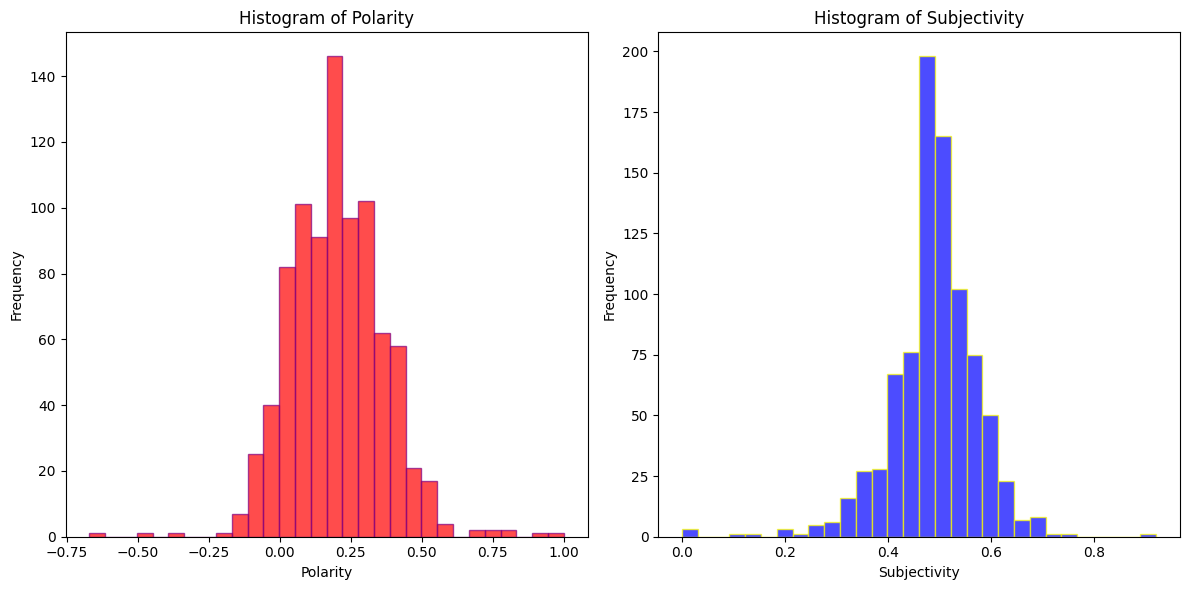

In [154]:
# Chart - 1 visualization code
# In practice, you will use the original dataset again for plotting
df = pd.read_csv('final_review_data.csv')

# Histogram for Polarity and Subjectivity
plt.figure(figsize=(12, 6))

# Histogram for Polarity
plt.subplot(1, 2, 1)
plt.hist(df['Polarity'], bins=30, edgecolor='purple', alpha=0.7, color="red")
plt.title('Histogram of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Histogram for Subjectivity
plt.subplot(1, 2, 2)
plt.hist(df['Subjectivity'], bins=30, edgecolor='yellow', alpha=0.7, color="blue")
plt.title('Histogram of Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

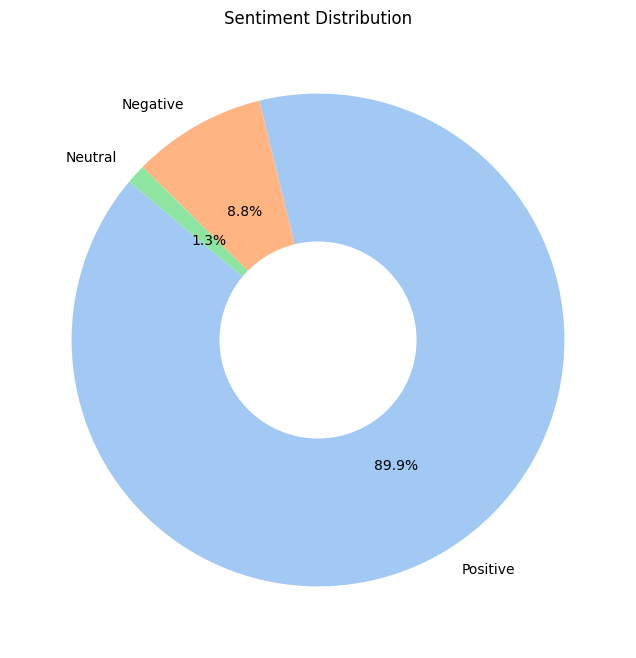

In [ ]:
# Load the dataset
df = pd.read_csv('final_review_data.csv')

# Sentiment Distribution Donut Chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Sentiment Distribution')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

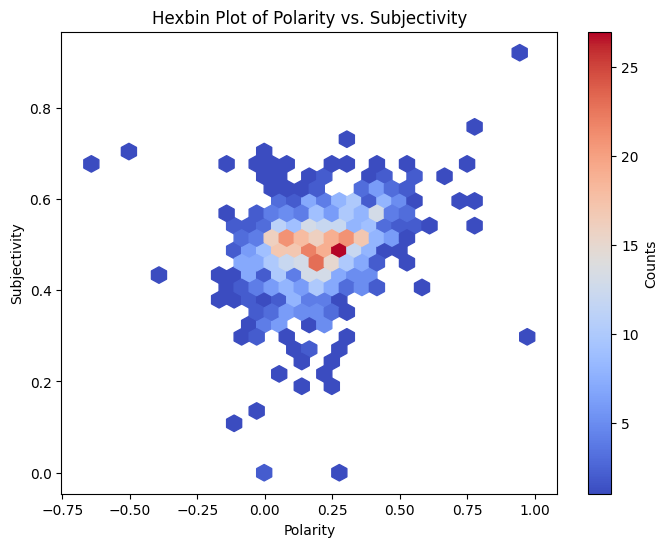

In [ ]:
# Load the dataset
df = pd.read_csv('final_review_data.csv')

# Hexbin Plot
plt.figure(figsize=(8, 6))
plt.hexbin(df['Polarity'], df['Subjectivity'], gridsize=30, cmap='coolwarm', mincnt=1)
plt.colorbar(label='Counts')
plt.title('Hexbin Plot of Polarity vs. Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

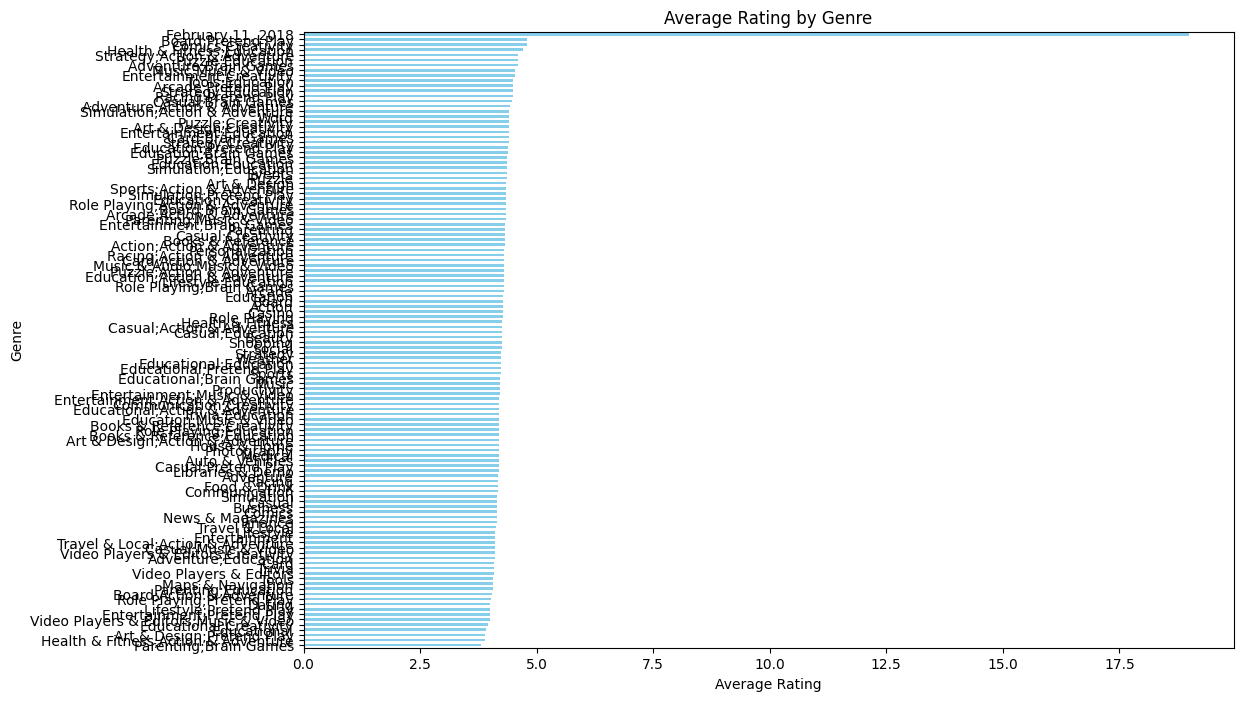

In [155]:
# Chart - 4 visualization code
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Bar Chart: Average Rating by Genre
plt.figure(figsize=(12, 8))
genre_ratings = df.groupby('Genres')['Rating'].mean().sort_values()
genre_ratings.plot(kind='barh', color='skyblue')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [159]:
# Chart - 5 visualization code
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Scatter Plot: Reviews vs. Rating
plt.figure(figsize=(8, 6))
plt.scatter(df['Reviews'].astype(float), df['Rating'], alpha=0.5, color='coral')
plt.title('Scatter Plot of Reviews vs. Rating')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

ValueError: could not convert string to float: '3.0M'

<Figure size 800x600 with 0 Axes>

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [160]:
# Chart - 6 visualization code
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Box Plot: App Size by Category
plt.figure(figsize=(12, 8))
df['Size'] = df['Size'].str.replace('M', '').astype(float) * 1024  # Convert MB to KB
sns.boxplot(x='Category', y='Size', data=df)
plt.title('Box Plot of App Size by Category')
plt.xlabel('Category')
plt.ylabel('Size (KB)')
plt.xticks(rotation=90)
plt.show()


ValueError: could not convert string to float: 'Varies with device'

<Figure size 1200x800 with 0 Axes>

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

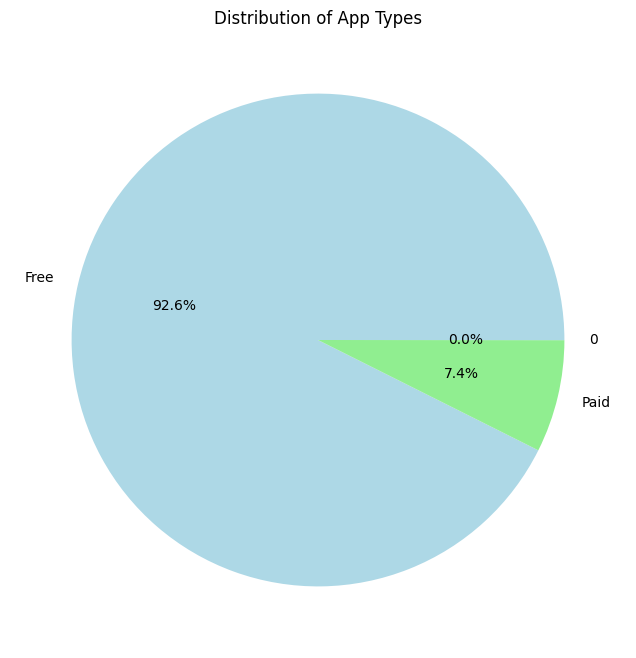

In [161]:
# Chart - 7 visualization code
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Pie Chart: Distribution of App Types
plt.figure(figsize=(8, 8))
type_counts = df['Type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of App Types')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

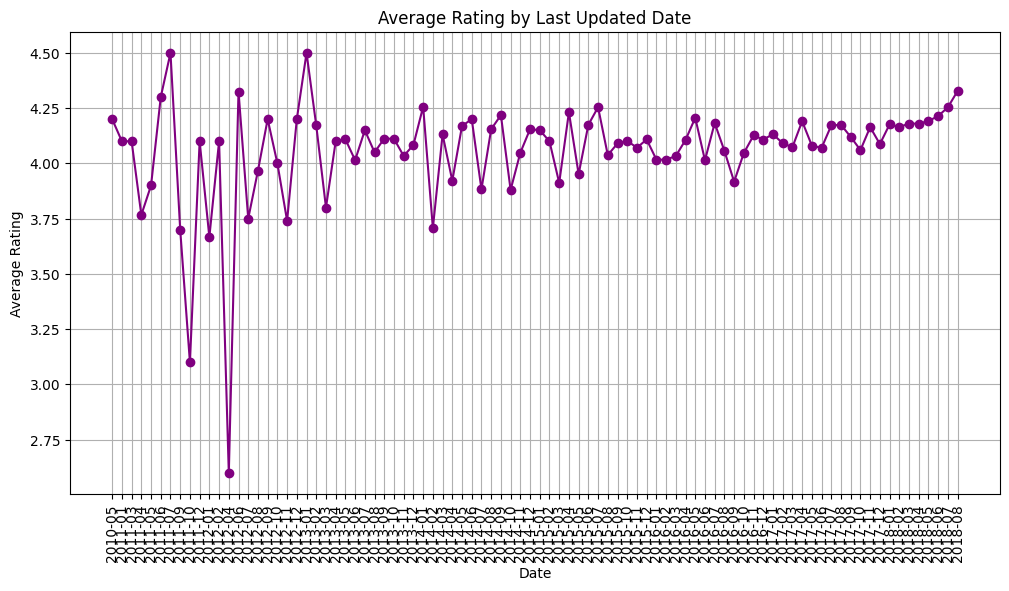

In [162]:
# Chart - 8 visualization code
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Convert 'Last Updated' to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df = df.dropna(subset=['Last Updated'])

# Line Plot: Average Rating by Last Updated Date
plt.figure(figsize=(12, 6))
df_grouped = df.groupby(df['Last Updated'].dt.to_period('M')).agg({'Rating': 'mean'}).reset_index()
plt.plot(df_grouped['Last Updated'].astype(str), df_grouped['Rating'], marker='o', color='purple')
plt.title('Average Rating by Last Updated Date')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [163]:
# Chart - 9 visualization code
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Bar Chart: Average Installs by Content Rating
plt.figure(figsize=(12, 8))
content_rating_installs = df.groupby('Content Rating')['Installs'].mean()
content_rating_installs.plot(kind='bar', color='lightcoral')
plt.title('Average Installs by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Average Installs')
plt.xticks(rotation=45)
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

<Figure size 1200x800 with 0 Axes>

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [164]:
# Chart - 10 visualization code
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Convert relevant columns to numeric
df['Price'] = df['Price'].replace({r'\$': '', ',': ''}, regex=True).astype(float)
df['Installs'] = df['Installs'].replace({r'[,+]': ''}, regex=True).astype(float)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Reviews', 'Size', 'Installs', 'Price', 'Rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


ValueError: could not convert string to float: '3.0M'

<Figure size 1000x800 with 0 Axes>

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

C:\Users\kusha\AppData\Local\Temp\ipykernel_4740\1259678193.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='Rating', data=df, palette='pastel')


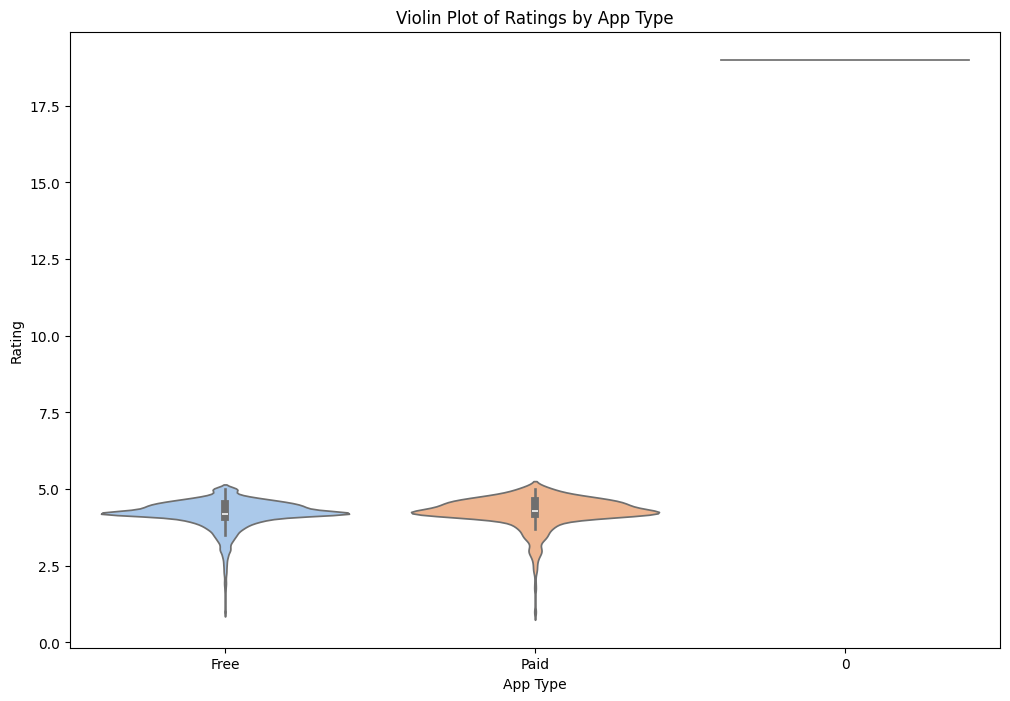

In [165]:
# Chart - 11 visualization code
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Violin Plot: Ratings by App Type
plt.figure(figsize=(12, 8))
sns.violinplot(x='Type', y='Rating', data=df, palette='pastel')
plt.title('Violin Plot of Ratings by App Type')
plt.xlabel('App Type')
plt.ylabel('Rating')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

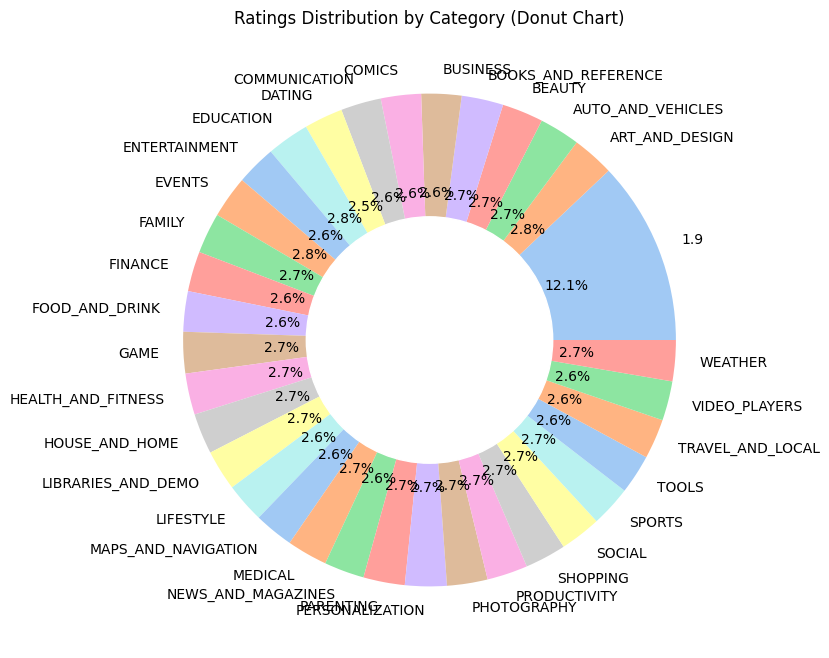

In [166]:
# Chart - 12 visualization code
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Donut Chart: Ratings Distribution by Category
plt.figure(figsize=(10, 8))
category_ratings = df.groupby('Category')['Rating'].mean()
plt.pie(category_ratings, labels=category_ratings.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.gca().add_artist(plt.Circle((0, 0), 0.5, color='white'))
plt.title('Ratings Distribution by Category (Donut Chart)')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

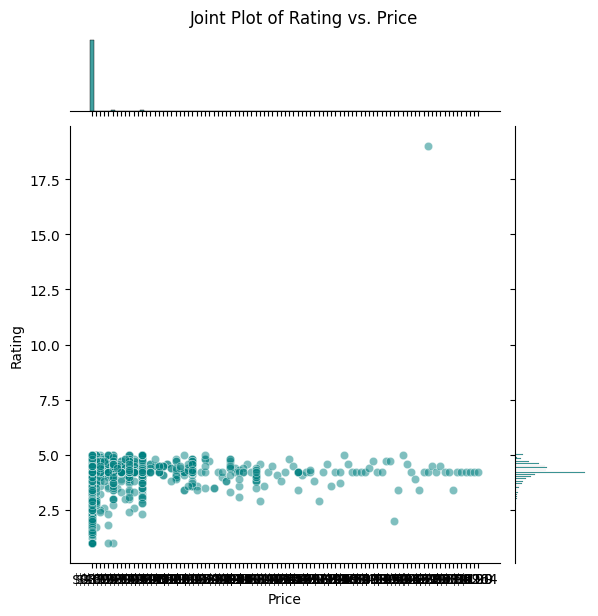

In [167]:
# Chart - 13 visualization code
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Joint Plot: Rating vs. Price
sns.jointplot(x='Price', y='Rating', data=df, kind='scatter', color='teal', alpha=0.5)
plt.suptitle('Joint Plot of Rating vs. Price', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

C:\Users\kusha\AppData\Local\Temp\ipykernel_4740\1076911759.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Rating', data=df, palette='viridis')


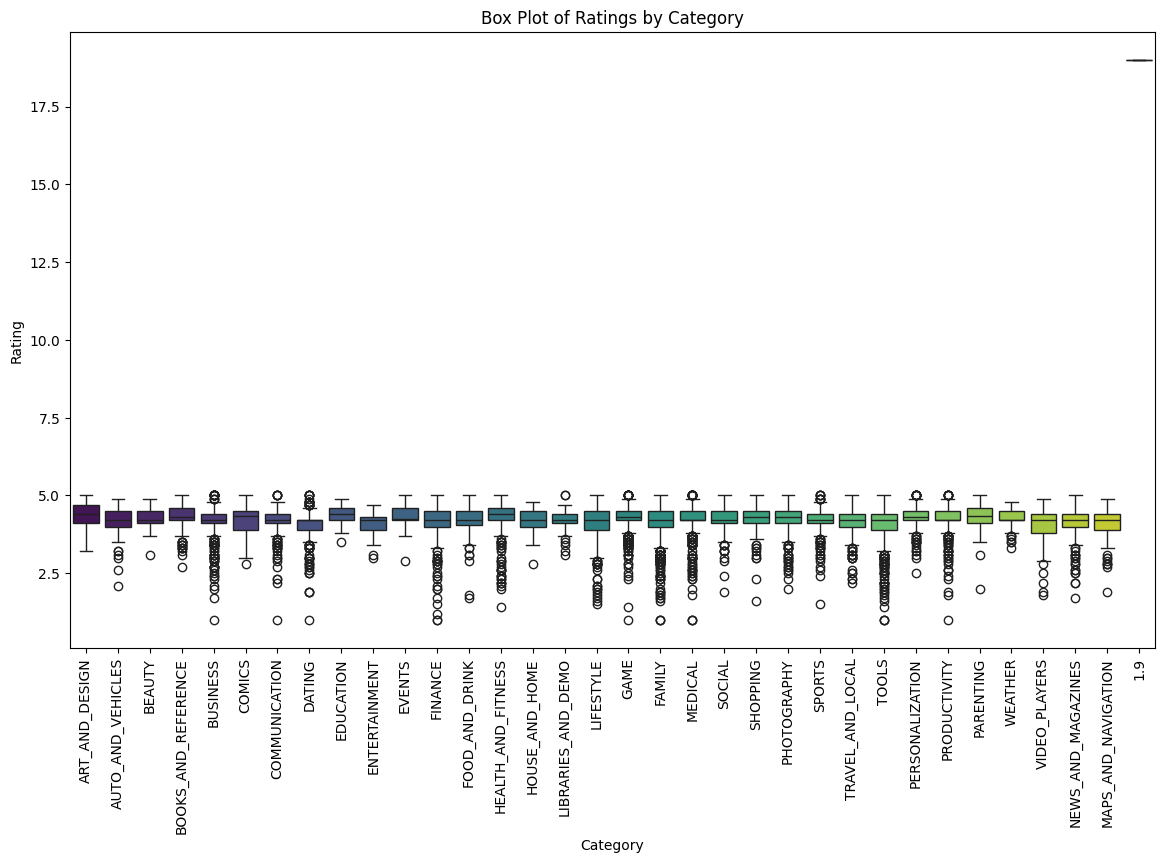

In [168]:
# Correlation Heatmap visualization code
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Box Plot: Ratings by Category
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Rating', data=df, palette='viridis')
plt.title('Box Plot of Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

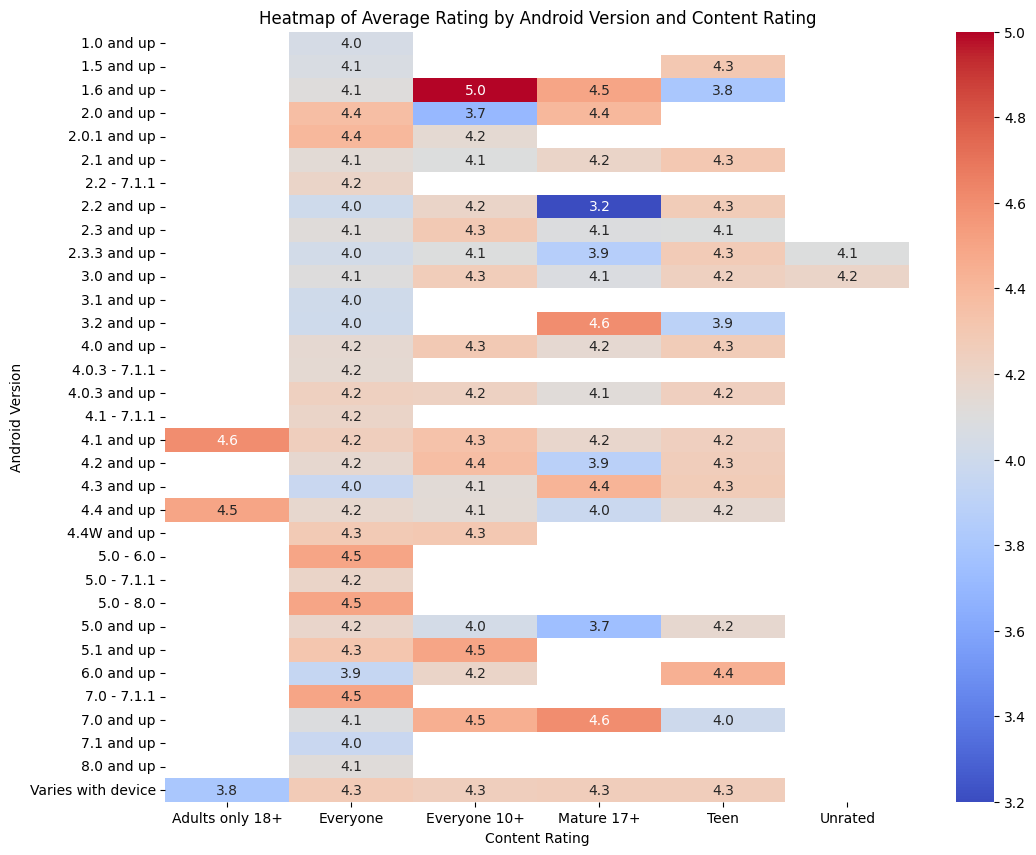

In [169]:
# Pair Plot visualization code
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Pivot Table: Average Rating by Android Version and Content Rating
heatmap_data = df.pivot_table(index='Android Ver', columns='Content Rating', values='Rating', aggfunc='mean')

# Heatmap: Average Rating by Android Version and Content Rating
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Heatmap of Average Rating by Android Version and Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Android Version')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***